In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
# import lightgbm as lgb

In [48]:
df = pd.read_csv('output/please_final.csv', encoding='utf8')

In [65]:
df

,Month,강수,강수형태,기온,풍속,풍향,자전거대여소명,학원_5분이내수,학원_5분이내거리최소,학원_5분이내거리평균,...,관광/여가/오락_5분이내거리최대,지하철 역_5분이내수,지하철 역_5분이내거리최소,지하철 역_5분이내거리평균,지하철 역_5분이내거리최대,청소년 수련시설_5분이내수,청소년 수련시설_5분이내거리최소,청소년 수련시설_5분이내거리평균,청소년 수련시설_5분이내거리최대,자전거대여량
0,17-Mar,0.012097,0.036290,6.563172,0.944220,238.681452,상동역,263,0.000709,0.00222,...,0.003812,1,0.003158,0.003158,0.003158,0,0.0025,0.0025,0.0025,234
1,17-Apr,0.074167,0.055556,13.501667,1.083333,220.954167,상동역,263,0.000709,0.00222,...,0.003812,1,0.003158,0.003158,0.003158,0,0.0025,0.0025,0.0025,225
2,17-May,0.027016,0.037634,18.493280,0.996102,237.064516,상동역,263,0.000709,0.00222,...,0.003812,1,0.003158,0.003158,0.003158,0,0.0025,0.0025,0.0025,304
3,17-Jun,0.055556,0.000000,22.890278,0.988056,226.519444,상동역,263,0.000709,0.00222,...,0.003812,1,0.003158,0.003158,0.003158,0,0.0025,0.0025,0.0025,343
4,17-Jul,0.663844,0.000000,26.819086,0.983333,205.805107,상동역,263,0.000709,0.00222,...,0.003812,1,0.003158,0.003158,0.003158,0,0.0025,0.0025,0.0025,363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,19-Aug,0.162634,0.034946,26.125672,0.310081,127.865591,굴포천,0,0.002500,0.00250,...,0.002500,0,0.002500,0.002500,0.002500,0,0.0025,0.0025,0.0025,94
206,19-Sep,0.302778,0.086111,21.795417,0.453750,123.769444,굴포천,0,0.002500,0.00250,...,0.002500,0,0.002500,0.002500,0.002500,0,0.0025,0.0025,0.0025,125
207,19-Oct,0.048387,0.044355,14.989516,0.413441,123.321237,굴포천,0,0.002500,0.00250,...,0.002500,0,0.002500,0.002500,0.002500,0,0.0025,0.0025,0.0025,231
208,19-Nov,0.125694,0.061111,5.799861,0.443889,141.069444,굴포천,0,0.002500,0.00250,...,0.002500,0,0.002500,0.002500,0.002500,0,0.0025,0.0025,0.0025,117


In [66]:
df.dtypes

Month                 object
강수                   float64
강수형태                 float64
기온                   float64
풍속                   float64
                      ...   
청소년 수련시설_5분이내수         int64
청소년 수련시설_5분이내거리최소    float64
청소년 수련시설_5분이내거리평균    float64
청소년 수련시설_5분이내거리최대    float64
자전거대여량                 int64
Length: 84, dtype: object

In [51]:
df = df.drop(columns="Unnamed: 0")

In [52]:
df

,Month,강수,강수형태,기온,풍속,풍향,자전거대여소명,학원_5분이내수,학원_5분이내거리최소,학원_5분이내거리평균,...,관광/여가/오락_5분이내거리최대,지하철 역_5분이내수,지하철 역_5분이내거리최소,지하철 역_5분이내거리평균,지하철 역_5분이내거리최대,청소년 수련시설_5분이내수,청소년 수련시설_5분이내거리최소,청소년 수련시설_5분이내거리평균,청소년 수련시설_5분이내거리최대,자전거대여량
0,17-Mar,0.012097,0.036290,6.563172,0.944220,238.681452,상동역,263,0.000709,0.00222,...,0.003812,1,0.003158,0.003158,0.003158,0,0.0025,0.0025,0.0025,234
1,17-Apr,0.074167,0.055556,13.501667,1.083333,220.954167,상동역,263,0.000709,0.00222,...,0.003812,1,0.003158,0.003158,0.003158,0,0.0025,0.0025,0.0025,225
2,17-May,0.027016,0.037634,18.493280,0.996102,237.064516,상동역,263,0.000709,0.00222,...,0.003812,1,0.003158,0.003158,0.003158,0,0.0025,0.0025,0.0025,304
3,17-Jun,0.055556,0.000000,22.890278,0.988056,226.519444,상동역,263,0.000709,0.00222,...,0.003812,1,0.003158,0.003158,0.003158,0,0.0025,0.0025,0.0025,343
4,17-Jul,0.663844,0.000000,26.819086,0.983333,205.805107,상동역,263,0.000709,0.00222,...,0.003812,1,0.003158,0.003158,0.003158,0,0.0025,0.0025,0.0025,363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,19-Aug,0.162634,0.034946,26.125672,0.310081,127.865591,굴포천,0,0.002500,0.00250,...,0.002500,0,0.002500,0.002500,0.002500,0,0.0025,0.0025,0.0025,94
206,19-Sep,0.302778,0.086111,21.795417,0.453750,123.769444,굴포천,0,0.002500,0.00250,...,0.002500,0,0.002500,0.002500,0.002500,0,0.0025,0.0025,0.0025,125
207,19-Oct,0.048387,0.044355,14.989516,0.413441,123.321237,굴포천,0,0.002500,0.00250,...,0.002500,0,0.002500,0.002500,0.002500,0,0.0025,0.0025,0.0025,231
208,19-Nov,0.125694,0.061111,5.799861,0.443889,141.069444,굴포천,0,0.002500,0.00250,...,0.002500,0,0.002500,0.002500,0.002500,0,0.0025,0.0025,0.0025,117


In [5]:
df["자전거대여소명"].unique()

array(['상동역', '시청역', '신중동역', '부천역', '송내역', '부천시청', '굴포천'], dtype=object)

## 전체

In [103]:
## 전체


x = df[['강수','강수형태','기온','풍속','풍향','학원_5분이내수', '학원_5분이내거리최소','학원_5분이내거리평균','학원_5분이내거리최대','버스_5분이내수','버스_5분이내거리최소','버스_5분이내거리평균','버스_5분이내거리최대',
               '콘서트장_5분이내수','콘서트장_5분이내거리최소','콘서트장_5분이내거리평균','콘서트장_5분이내거리최대','공공시설_5분이내수','공공시설_5분이내거리최소','공공시설_5분이내거리평균','공공시설_5분이내거리최대',
               '홀_5분이내수','홀_5분이내거리최소','홀_5분이내거리평균','홀_5분이내거리최대','미술관박물관(전시시설)_5분이내수','미술관박물관(전시시설)_5분이내거리최소','미술관박물관(전시시설)_5분이내거리평균','미술관박물관(전시시설)_5분이내거리최대','학교_5분이내수','학교_5분이내거리최소','학교_5분이내거리평균','학교_5분이내거리최대','체육시설_5분이내수','체육시설_5분이내거리최소',
               '체육시설_5분이내거리평균','체육시설_5분이내거리최대','스타벅스_5분이내수','스타벅스_5분이내거리최소','스타벅스_5분이내거리평균','스타벅스_5분이내거리최대','부동산_5분이내수','부동산_5분이내거리최소','부동산_5분이내거리평균','부동산_5분이내거리최대','학문/교육_5분이내수','학문/교육_5분이내거리최소','학문/교육_5분이내거리평균','학문/교육_5분이내거리최대',
               '음식점_5분이내수','음식점_5분이내거리최소','음식점_5분이내거리평균','음식점_5분이내거리최대','생활서비스_5분이내수','생활서비스_5분이내거리최소','생활서비스_5분이내거리평균','생활서비스_5분이내거리최대','소매점_5분이내수','소매점_5분이내거리최소','소매점_5분이내거리평균','소매점_5분이내거리최대','스포츠_5분이내수','스포츠_5분이내거리최소','스포츠_5분이내거리평균',
               '스포츠_5분이내거리최대','숙박_5분이내수','숙박_5분이내거리최소','숙박_5분이내거리평균','숙박_5분이내거리최대','관광/여가/오락_5분이내수','관광/여가/오락_5분이내거리최소','관광/여가/오락_5분이내거리평균','관광/여가/오락_5분이내거리최대','지하철 역_5분이내수','지하철 역_5분이내거리최소','지하철 역_5분이내거리평균','지하철 역_5분이내거리최대','청소년 수련시설_5분이내수','청소년 수련시설_5분이내거리최소','청소년 수련시설_5분이내거리평균','청소년 수련시설_5분이내거리최대']]


y = df[['자전거대여량']]

In [104]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [105]:
mlr = LinearRegression()
mlr.fit(x_train, y_train) 

LinearRegression()

In [106]:
y_predict = mlr.predict(x_test)

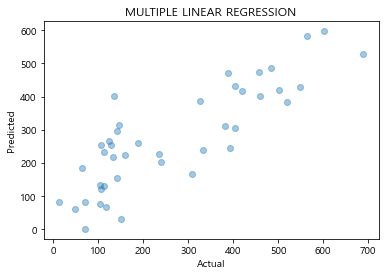

In [107]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

In [108]:
print(mlr.score(x_train, y_train))

0.8251347834732499


## 전진선택법

In [36]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [75]:
## 전진 선택법

variables = df[['강수','강수형태','기온','풍속','풍향','학원_5분이내수', '학원_5분이내거리최소','학원_5분이내거리평균','학원_5분이내거리최대','버스_5분이내수','버스_5분이내거리최소','버스_5분이내거리평균','버스_5분이내거리최대',
               '콘서트장_5분이내수','콘서트장_5분이내거리최소','콘서트장_5분이내거리평균','콘서트장_5분이내거리최대','공공시설_5분이내수','공공시설_5분이내거리최소','공공시설_5분이내거리평균','공공시설_5분이내거리최대',
               '홀_5분이내수','홀_5분이내거리최소','홀_5분이내거리평균','홀_5분이내거리최대','미술관박물관(전시시설)_5분이내수','미술관박물관(전시시설)_5분이내거리최소','미술관박물관(전시시설)_5분이내거리평균','미술관박물관(전시시설)_5분이내거리최대','학교_5분이내수','학교_5분이내거리최소','학교_5분이내거리평균','학교_5분이내거리최대','체육시설_5분이내수','체육시설_5분이내거리최소',
               '체육시설_5분이내거리평균','체육시설_5분이내거리최대','스타벅스_5분이내수','스타벅스_5분이내거리최소','스타벅스_5분이내거리평균','스타벅스_5분이내거리최대','부동산_5분이내수','부동산_5분이내거리최소','부동산_5분이내거리평균','부동산_5분이내거리최대','학문/교육_5분이내수','학문/교육_5분이내거리최소','학문/교육_5분이내거리평균','학문/교육_5분이내거리최대',
               '음식점_5분이내수','음식점_5분이내거리최소','음식점_5분이내거리평균','음식점_5분이내거리최대','생활서비스_5분이내수','생활서비스_5분이내거리최소','생활서비스_5분이내거리평균','생활서비스_5분이내거리최대','소매점_5분이내수','소매점_5분이내거리최소','소매점_5분이내거리평균','소매점_5분이내거리최대','스포츠_5분이내수','스포츠_5분이내거리최소','스포츠_5분이내거리평균',
               '스포츠_5분이내거리최대','숙박_5분이내수','숙박_5분이내거리최소','숙박_5분이내거리평균','숙박_5분이내거리최대','관광/여가/오락_5분이내수','관광/여가/오락_5분이내거리최소','관광/여가/오락_5분이내거리평균','관광/여가/오락_5분이내거리최대','지하철 역_5분이내수','지하철 역_5분이내거리최소','지하철 역_5분이내거리평균','지하철 역_5분이내거리최대','청소년 수련시설_5분이내수','청소년 수련시설_5분이내거리최소','청소년 수련시설_5분이내거리평균','청소년 수련시설_5분이내거리최대']]
y = df[['자전거대여량']]


selected_variables = [] ## 선택된 변수들
sl_enter = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = df[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(df[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

<ipython-input-75-82047c4816ae>:21: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## 변수의 p-value
<ipython-input-75-82047c4816ae>:21: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## 변수의 p-value
<ipython-input-75-82047c4816ae>:21: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## 변수의 p-value
<ipython-input-75-82047c4816ae>:21: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## 

In [76]:
selected_variables

['청소년 수련시설_5분이내거리최소',
 '청소년 수련시설_5분이내거리평균',
 '청소년 수련시설_5분이내거리최대',
 '공공시설_5분이내거리평균',
 '공공시설_5분이내거리최대',
 '공공시설_5분이내거리최소',
 '학원_5분이내거리최소',
 '스포츠_5분이내거리최대',
 '기온',
 '풍향',
 '스포츠_5분이내거리평균',
 '부동산_5분이내거리최대',
 '강수형태',
 '풍속']

In [77]:
## 전체

x = df[['청소년 수련시설_5분이내거리최소','청소년 수련시설_5분이내거리평균',
 '청소년 수련시설_5분이내거리최대','공공시설_5분이내거리평균',
 '공공시설_5분이내거리최대','공공시설_5분이내거리최소',
 '학원_5분이내거리최소','스포츠_5분이내거리최대',
 '기온','풍향','스포츠_5분이내거리평균','부동산_5분이내거리최대','강수형태','풍속']]
y = df[['자전거대여량']]

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [80]:
mlr = LinearRegression()
mlr.fit(x_train, y_train) 

LinearRegression()

In [81]:
y_predict = mlr.predict(x_test)

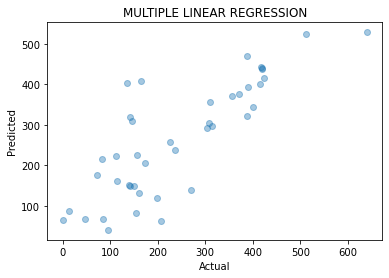

In [82]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

In [83]:
print(mlr.score(x_train, y_train))

0.8274280895858659


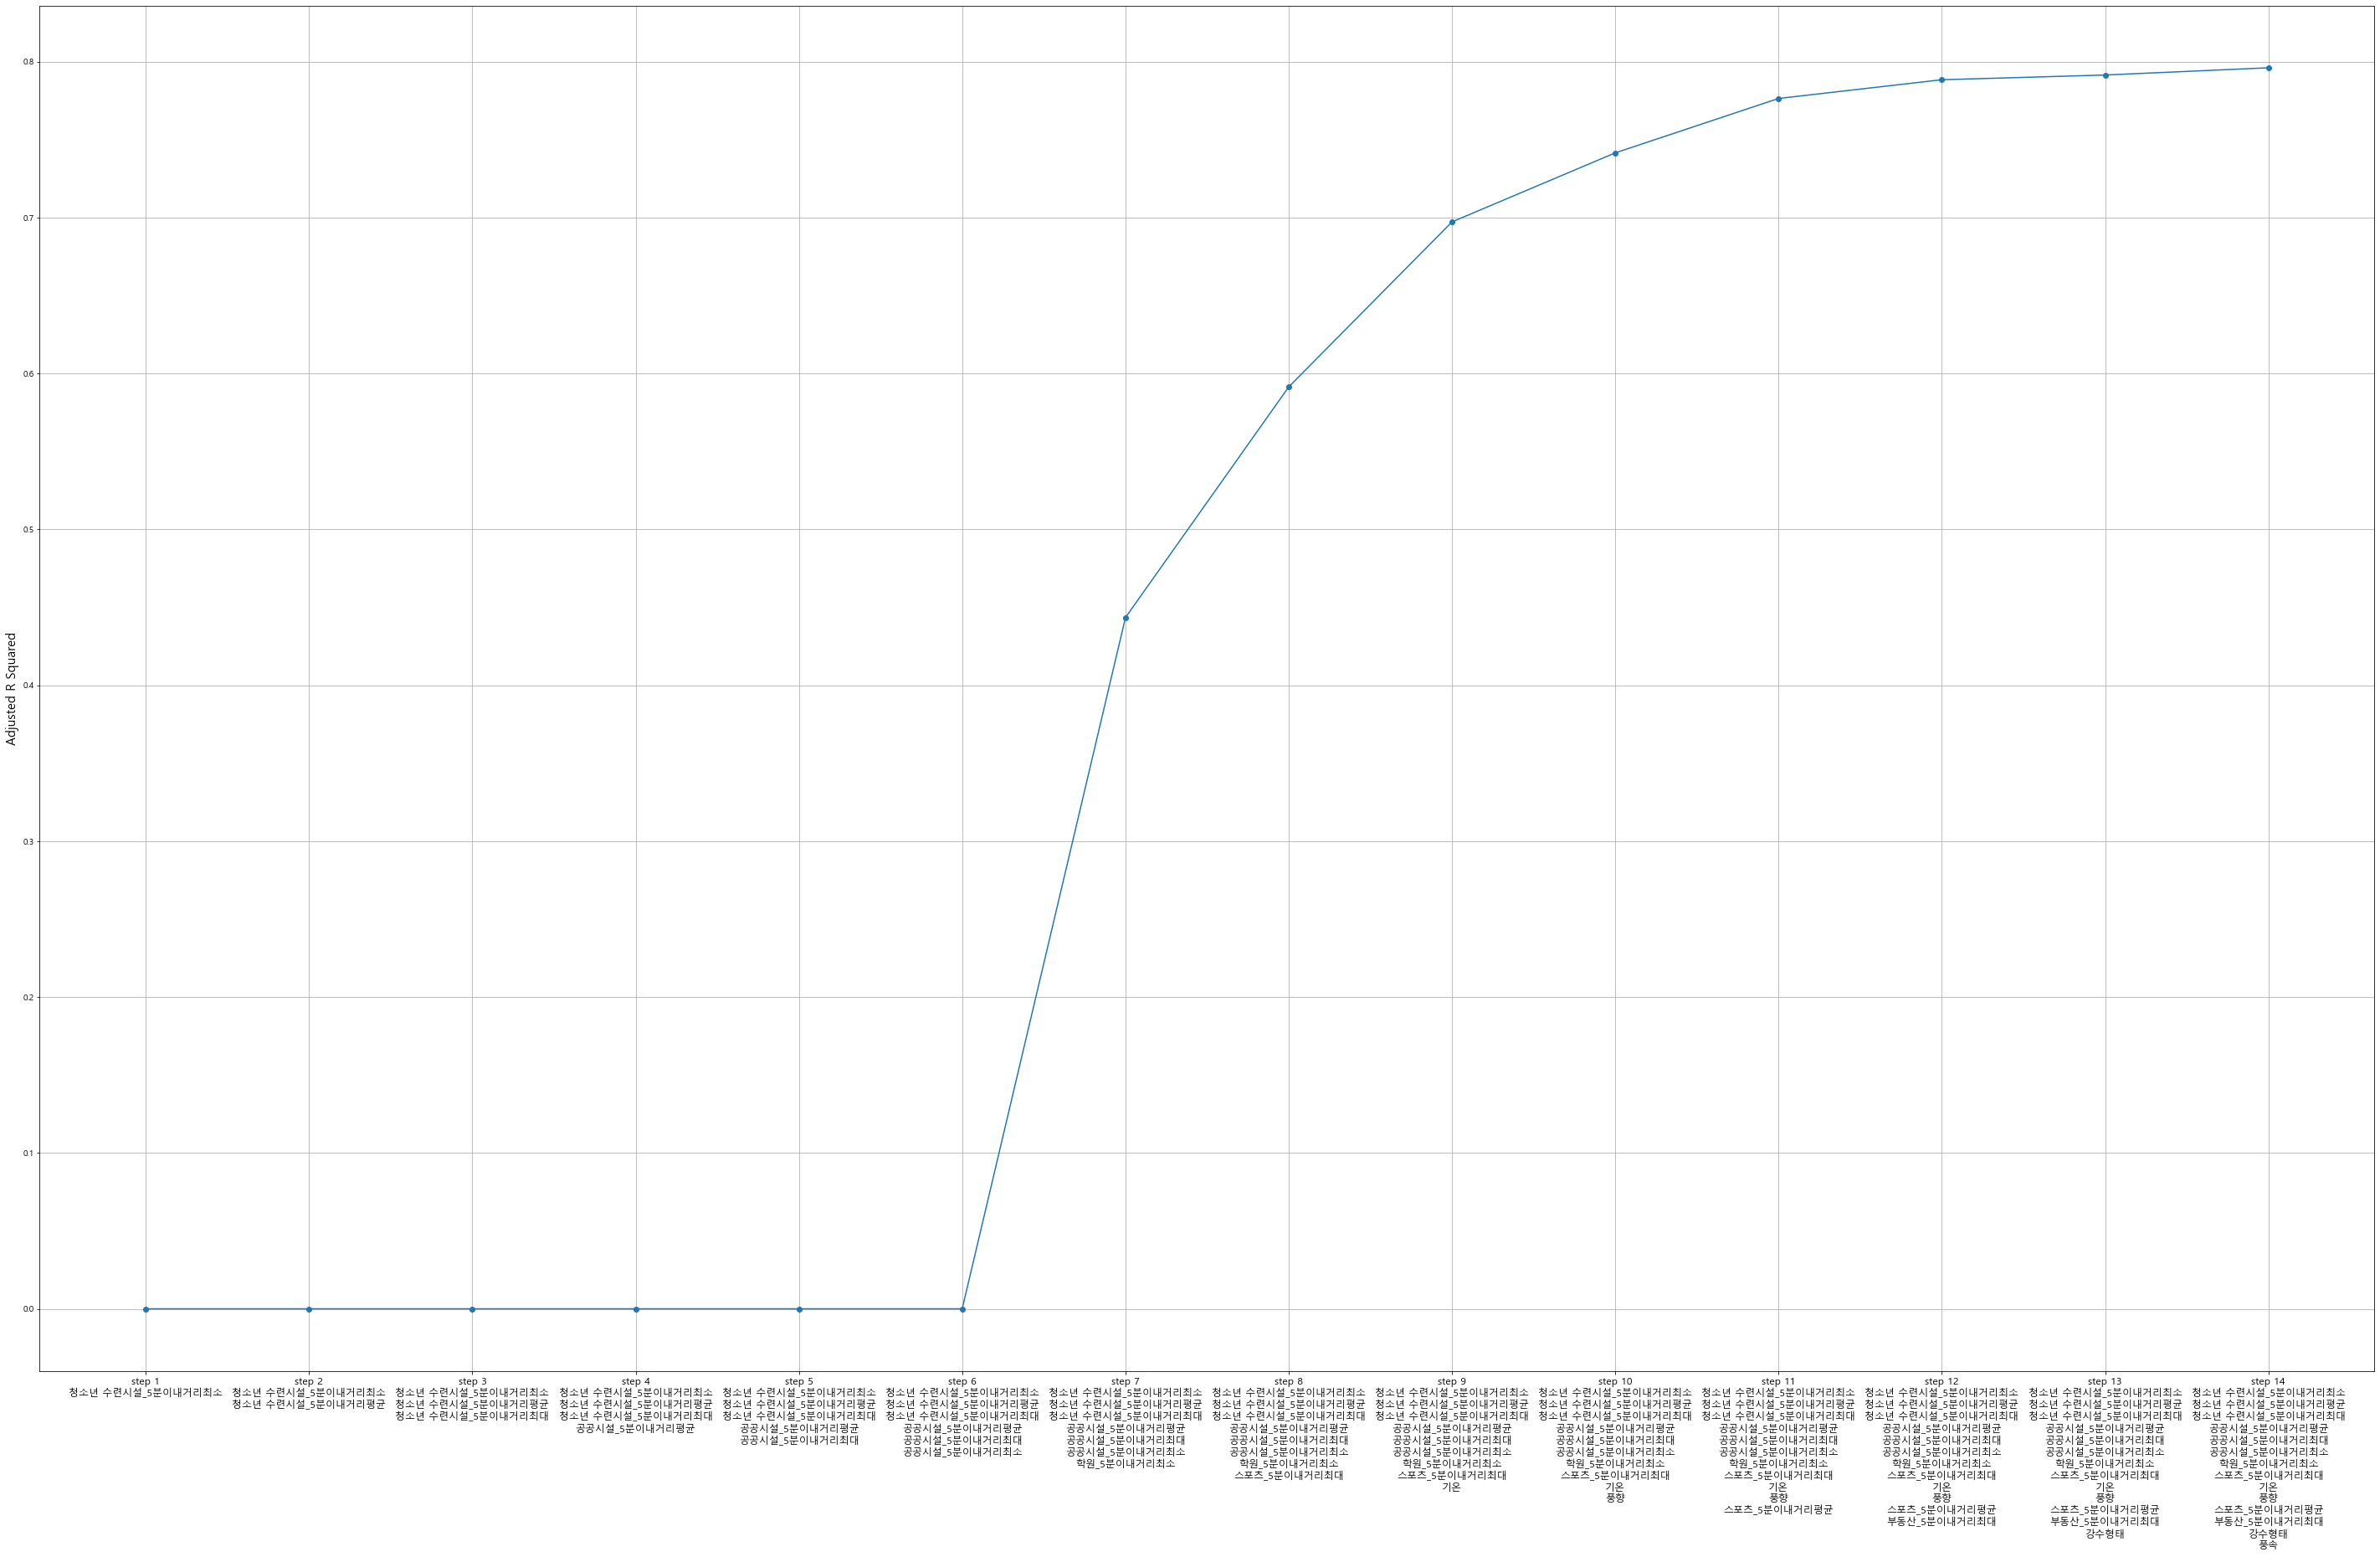

In [88]:
import matplotlib.pyplot as plt
plt.rc('font',family='Malgun Gothic')
plt.rc('axes', unicode_minus = False)

%matplotlib inline

fig = plt.figure(figsize=(50,30))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

# 전진 단계별 선택법

In [92]:
## 전진 단계별 선택법


variables = df[['강수','강수형태','기온','풍속','풍향','학원_5분이내수', '학원_5분이내거리최소','학원_5분이내거리평균','학원_5분이내거리최대','버스_5분이내수','버스_5분이내거리최소','버스_5분이내거리평균','버스_5분이내거리최대',
               '콘서트장_5분이내수','콘서트장_5분이내거리최소','콘서트장_5분이내거리평균','콘서트장_5분이내거리최대','공공시설_5분이내수','공공시설_5분이내거리최소','공공시설_5분이내거리평균','공공시설_5분이내거리최대',
               '홀_5분이내수','홀_5분이내거리최소','홀_5분이내거리평균','홀_5분이내거리최대','미술관박물관(전시시설)_5분이내수','미술관박물관(전시시설)_5분이내거리최소','미술관박물관(전시시설)_5분이내거리평균','미술관박물관(전시시설)_5분이내거리최대','학교_5분이내수','학교_5분이내거리최소','학교_5분이내거리평균','학교_5분이내거리최대','체육시설_5분이내수','체육시설_5분이내거리최소',
               '체육시설_5분이내거리평균','체육시설_5분이내거리최대','스타벅스_5분이내수','스타벅스_5분이내거리최소','스타벅스_5분이내거리평균','스타벅스_5분이내거리최대','부동산_5분이내수','부동산_5분이내거리최소','부동산_5분이내거리평균','부동산_5분이내거리최대','학문/교육_5분이내수','학문/교육_5분이내거리최소','학문/교육_5분이내거리평균','학문/교육_5분이내거리최대',
               '음식점_5분이내수','음식점_5분이내거리최소','음식점_5분이내거리평균','음식점_5분이내거리최대','생활서비스_5분이내수','생활서비스_5분이내거리최소','생활서비스_5분이내거리평균','생활서비스_5분이내거리최대','소매점_5분이내수','소매점_5분이내거리최소','소매점_5분이내거리평균','소매점_5분이내거리최대','스포츠_5분이내수','스포츠_5분이내거리최소','스포츠_5분이내거리평균',
               '스포츠_5분이내거리최대','숙박_5분이내수','숙박_5분이내거리최소','숙박_5분이내거리평균','숙박_5분이내거리최대','관광/여가/오락_5분이내수','관광/여가/오락_5분이내거리최소','관광/여가/오락_5분이내거리평균','관광/여가/오락_5분이내거리최대','지하철 역_5분이내수','지하철 역_5분이내거리최소','지하철 역_5분이내거리평균','지하철 역_5분이내거리최대','청소년 수련시설_5분이내수','청소년 수련시설_5분이내거리최소','청소년 수련시설_5분이내거리평균','청소년 수련시설_5분이내거리최대']]
y = df[['자전거대여량']]


selected_variables = [] ## 선택된 변수들
sl_enter = 0.05
sl_remove = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = df[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        ## 선택된 변수들에대해서
        ## 어떤 변수를 제거할지 고른다.
        while len(selected_variables) > 0:
            selected_X = df[selected_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y,selected_X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()
            if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                selected_variables.remove(remove_variable)
            else:
                break
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(df[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

<ipython-input-92-c618b03c4fd0>:23: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## 변수의 p-value
<ipython-input-92-c618b03c4fd0>:23: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## 변수의 p-value
<ipython-input-92-c618b03c4fd0>:23: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## 변수의 p-value
<ipython-input-92-c618b03c4fd0>:23: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## 

In [93]:
selected_variables

['청소년 수련시설_5분이내거리최소',
 '학원_5분이내거리최소',
 '스포츠_5분이내거리최대',
 '기온',
 '스포츠_5분이내거리평균',
 '부동산_5분이내거리최대',
 '강수형태',
 '풍속']

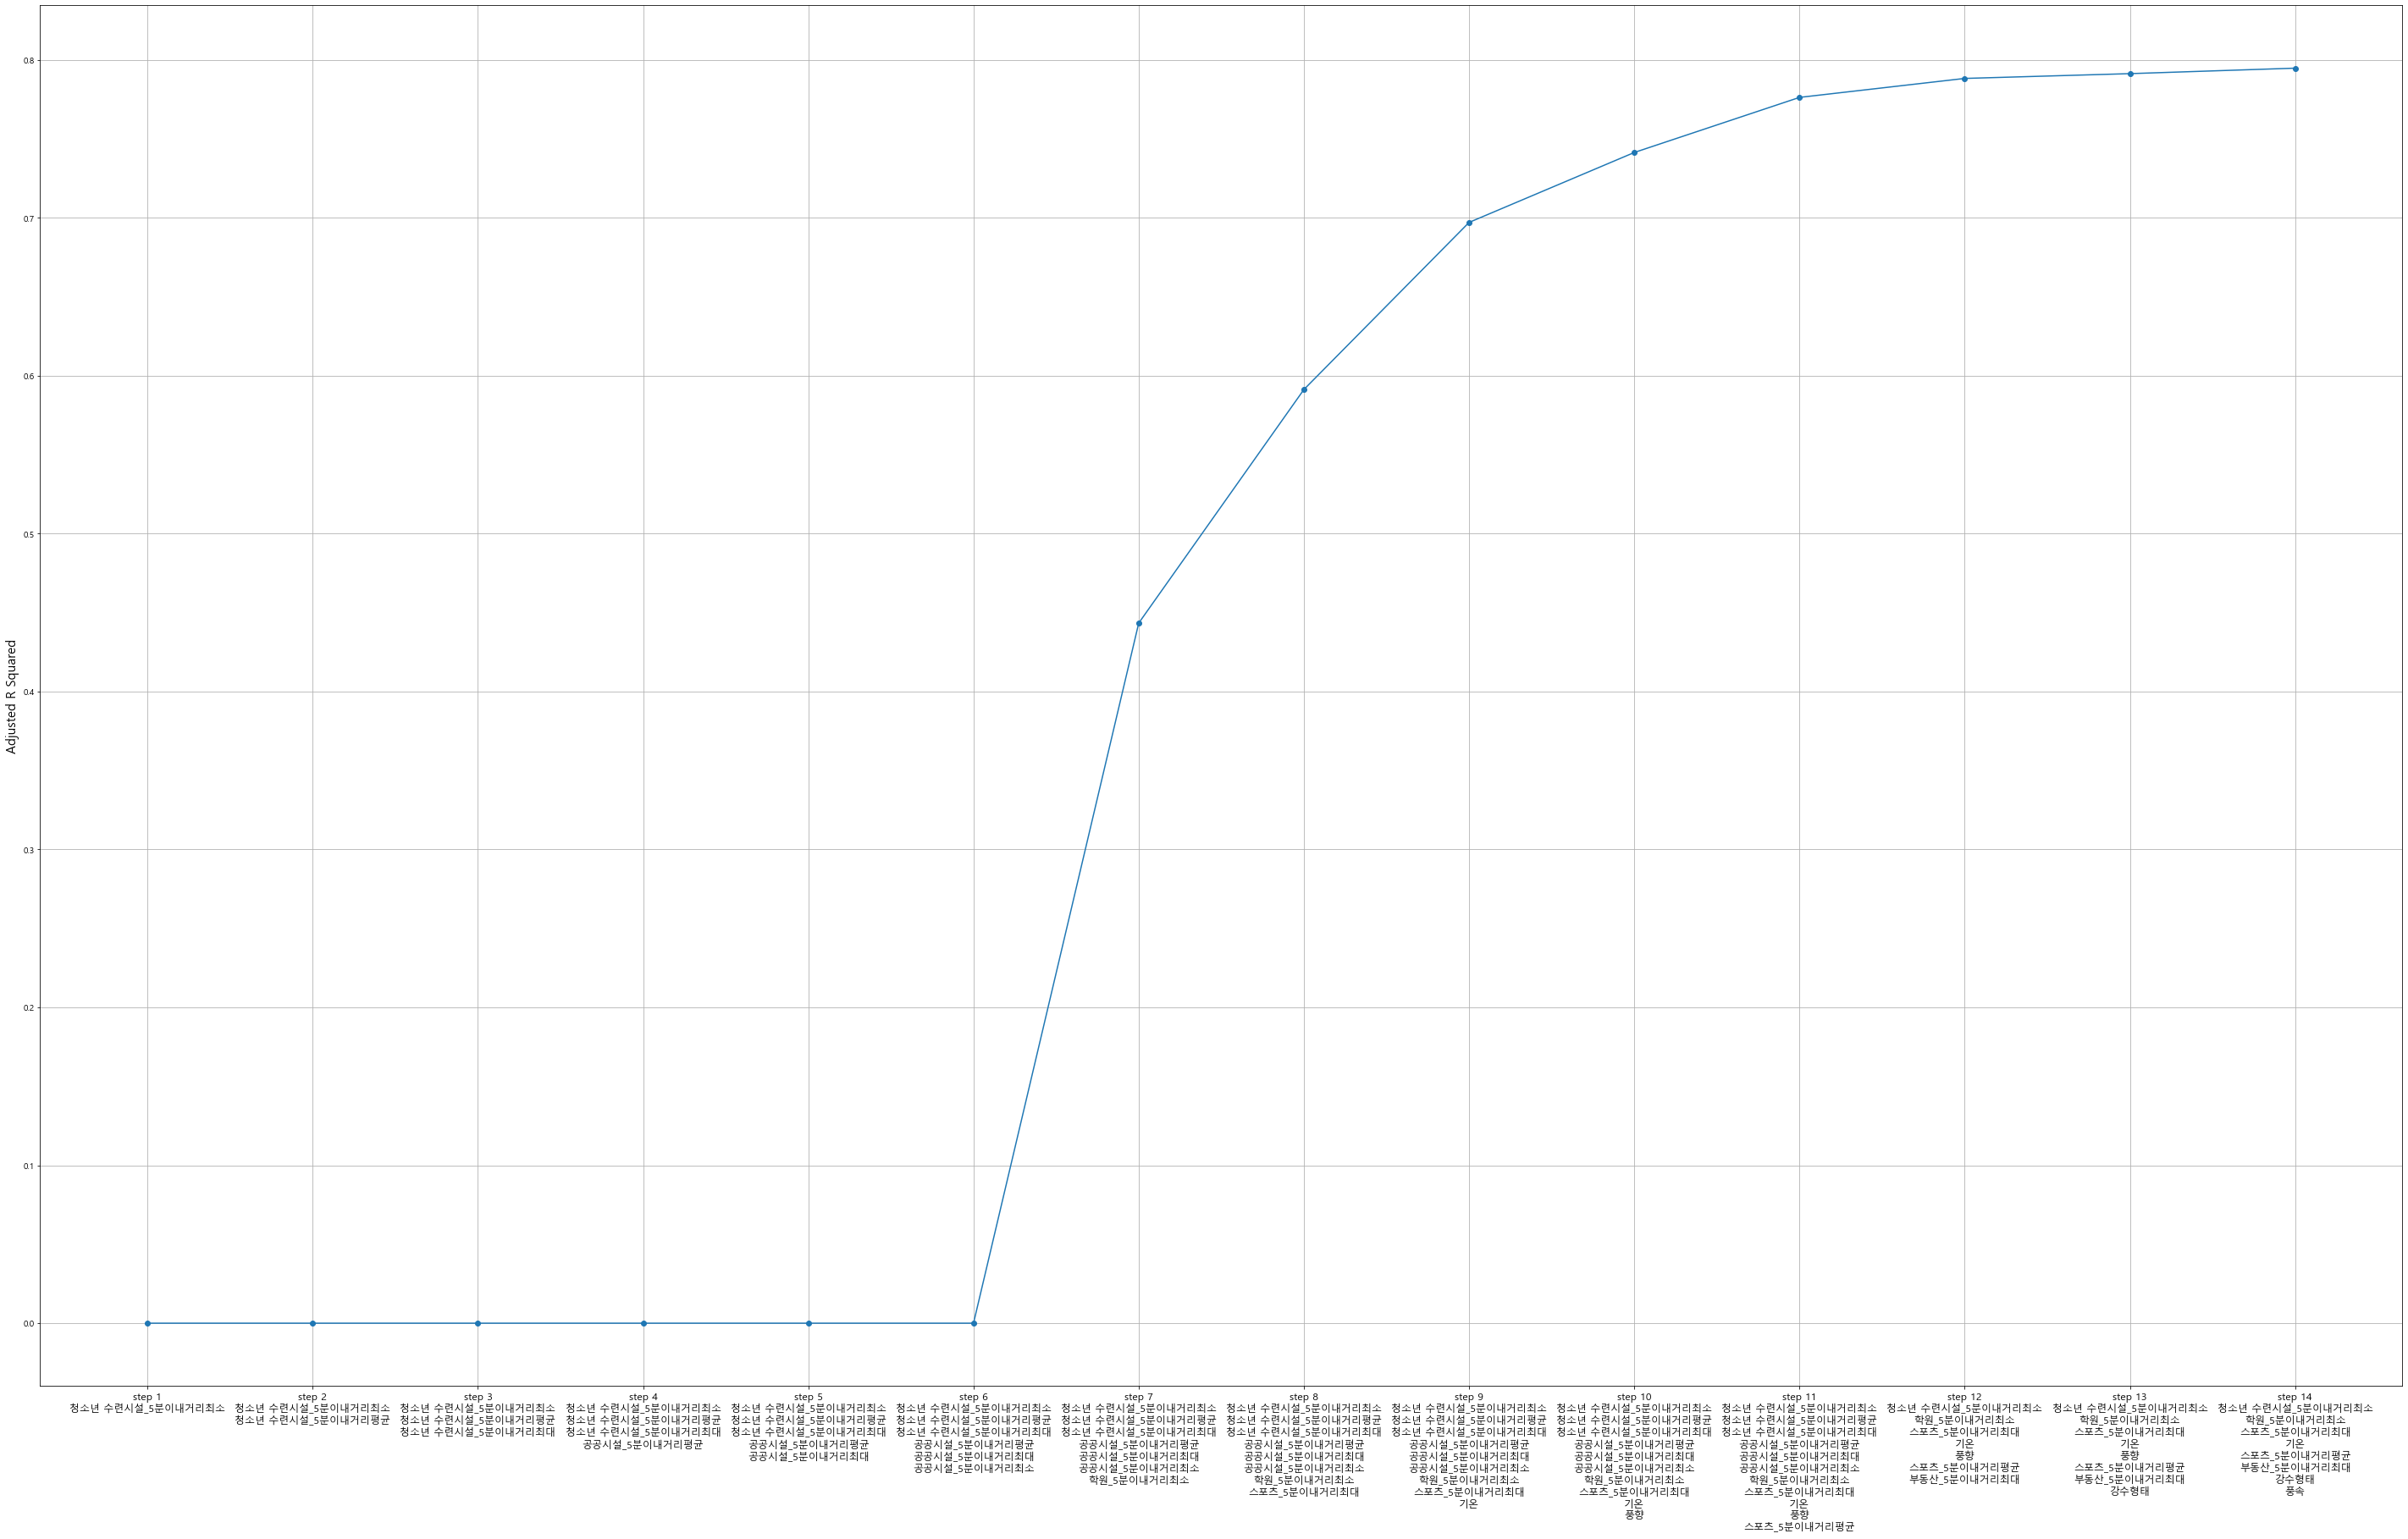

In [94]:
import matplotlib.pyplot as plt
plt.rc('font',family='Malgun Gothic')
plt.rc('axes', unicode_minus = False)

%matplotlib inline


fig = plt.figure(figsize=(50,30))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

In [111]:
## 요걸로 진행
x = df[['학원_5분이내거리최소',
 '스포츠_5분이내거리최대',
 '기온',
 '스포츠_5분이내거리평균',
 '부동산_5분이내거리최대',
 '강수형태',
 '풍속']]


In [110]:
display(x)

,학원_5분이내거리최소,스포츠_5분이내거리최대,기온,스포츠_5분이내거리평균,부동산_5분이내거리최대,강수형태,풍속
0,0.000709,0.003543,6.563172,0.002745,0.003916,0.036290,0.944220
1,0.000709,0.003543,13.501667,0.002745,0.003916,0.055556,1.083333
2,0.000709,0.003543,18.493280,0.002745,0.003916,0.037634,0.996102
3,0.000709,0.003543,22.890278,0.002745,0.003916,0.000000,0.988056
4,0.000709,0.003543,26.819086,0.002745,0.003916,0.000000,0.983333
...,...,...,...,...,...,...,...
205,0.002500,0.002500,26.125672,0.002500,0.003719,0.034946,0.310081
206,0.002500,0.002500,21.795417,0.002500,0.003719,0.086111,0.453750
207,0.002500,0.002500,14.989516,0.002500,0.003719,0.044355,0.413441
208,0.002500,0.002500,5.799861,0.002500,0.003719,0.061111,0.443889


## 후진 소거법

In [89]:
## 후진 소거법
variables = df[['강수','강수형태','기온','풍속','풍향','학원_5분이내수', '학원_5분이내거리최소','학원_5분이내거리평균','학원_5분이내거리최대','버스_5분이내수','버스_5분이내거리최소','버스_5분이내거리평균','버스_5분이내거리최대',
               '콘서트장_5분이내수','콘서트장_5분이내거리최소','콘서트장_5분이내거리평균','콘서트장_5분이내거리최대','공공시설_5분이내수','공공시설_5분이내거리최소','공공시설_5분이내거리평균','공공시설_5분이내거리최대',
               '홀_5분이내수','홀_5분이내거리최소','홀_5분이내거리평균','홀_5분이내거리최대','미술관박물관(전시시설)_5분이내수','미술관박물관(전시시설)_5분이내거리최소','미술관박물관(전시시설)_5분이내거리평균','미술관박물관(전시시설)_5분이내거리최대','학교_5분이내수','학교_5분이내거리최소','학교_5분이내거리평균','학교_5분이내거리최대','체육시설_5분이내수','체육시설_5분이내거리최소',
               '체육시설_5분이내거리평균','체육시설_5분이내거리최대','스타벅스_5분이내수','스타벅스_5분이내거리최소','스타벅스_5분이내거리평균','스타벅스_5분이내거리최대','부동산_5분이내수','부동산_5분이내거리최소','부동산_5분이내거리평균','부동산_5분이내거리최대','학문/교육_5분이내수','학문/교육_5분이내거리최소','학문/교육_5분이내거리평균','학문/교육_5분이내거리최대',
               '음식점_5분이내수','음식점_5분이내거리최소','음식점_5분이내거리평균','음식점_5분이내거리최대','생활서비스_5분이내수','생활서비스_5분이내거리최소','생활서비스_5분이내거리평균','생활서비스_5분이내거리최대','소매점_5분이내수','소매점_5분이내거리최소','소매점_5분이내거리평균','소매점_5분이내거리최대','스포츠_5분이내수','스포츠_5분이내거리최소','스포츠_5분이내거리평균',
               '스포츠_5분이내거리최대','숙박_5분이내수','숙박_5분이내거리최소','숙박_5분이내거리평균','숙박_5분이내거리최대','관광/여가/오락_5분이내수','관광/여가/오락_5분이내거리최소','관광/여가/오락_5분이내거리평균','관광/여가/오락_5분이내거리최대','지하철 역_5분이내수','지하철 역_5분이내거리최소','지하철 역_5분이내거리평균','지하철 역_5분이내거리최대','청소년 수련시설_5분이내수','청소년 수련시설_5분이내거리최소','청소년 수련시설_5분이내거리평균','청소년 수련시설_5분이내거리최대']]
y = df[['자전거대여량']]


selected_variables = variables ## 초기에는 모든 변수가 선택된 상태
sl_remove = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(selected_variables) > 0:
    X = sm.add_constant(df[selected_variables])
    p_vals = sm.OLS(y,X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
    max_pval = p_vals.max() ## 최대 p-value
    if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
        remove_variable = p_vals.idxmax()
        selected_variables.remove(remove_variable)
 
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(df[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

ValueError: Boolean array expected for the condition, not float64

In [40]:
selected_variables

,강수,강수형태,기온,풍속,풍향,학원_5분이내수,학원_5분이내거리최소,학원_5분이내거리평균,학원_5분이내거리최대,버스_5분이내수,...,관광/여가/오락_5분이내거리평균,관광/여가/오락_5분이내거리최대,지하철 역_5분이내수,지하철 역_5분이내거리최소,지하철 역_5분이내거리평균,지하철 역_5분이내거리최대,청소년 수련시설_5분이내수,청소년 수련시설_5분이내거리최소,청소년 수련시설_5분이내거리평균,청소년 수련시설_5분이내거리최대
0,0.012097,0.036290,6.563172,0.944220,238.681452,263,0.000709,0.00222,0.003952,23,...,0.002346,0.003812,1,0.003158,0.003158,0.003158,0,0.0025,0.0025,0.0025
1,0.074167,0.055556,13.501667,1.083333,220.954167,263,0.000709,0.00222,0.003952,23,...,0.002346,0.003812,1,0.003158,0.003158,0.003158,0,0.0025,0.0025,0.0025
2,0.027016,0.037634,18.493280,0.996102,237.064516,263,0.000709,0.00222,0.003952,23,...,0.002346,0.003812,1,0.003158,0.003158,0.003158,0,0.0025,0.0025,0.0025
3,0.055556,0.000000,22.890278,0.988056,226.519444,263,0.000709,0.00222,0.003952,23,...,0.002346,0.003812,1,0.003158,0.003158,0.003158,0,0.0025,0.0025,0.0025
4,0.663844,0.000000,26.819086,0.983333,205.805107,263,0.000709,0.00222,0.003952,23,...,0.002346,0.003812,1,0.003158,0.003158,0.003158,0,0.0025,0.0025,0.0025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,0.162634,0.034946,26.125672,0.310081,127.865591,0,0.002500,0.00250,0.002500,16,...,0.002500,0.002500,0,0.002500,0.002500,0.002500,0,0.0025,0.0025,0.0025
206,0.302778,0.086111,21.795417,0.453750,123.769444,0,0.002500,0.00250,0.002500,16,...,0.002500,0.002500,0,0.002500,0.002500,0.002500,0,0.0025,0.0025,0.0025
207,0.048387,0.044355,14.989516,0.413441,123.321237,0,0.002500,0.00250,0.002500,16,...,0.002500,0.002500,0,0.002500,0.002500,0.002500,0,0.0025,0.0025,0.0025
208,0.125694,0.061111,5.799861,0.443889,141.069444,0,0.002500,0.00250,0.002500,16,...,0.002500,0.002500,0,0.002500,0.002500,0.002500,0,0.0025,0.0025,0.0025


## pca 분석

In [30]:
columns = ['강수','강수형태','기온','풍속','풍향','학원_5분이내수', '학원_5분이내거리최소','학원_5분이내거리평균','학원_5분이내거리최대','버스_5분이내수','버스_5분이내거리최소','버스_5분이내거리평균','버스_5분이내거리최대',
               '콘서트장_5분이내수','콘서트장_5분이내거리최소','콘서트장_5분이내거리평균','콘서트장_5분이내거리최대','공공시설_5분이내수','공공시설_5분이내거리최소','공공시설_5분이내거리평균','공공시설_5분이내거리최대',
               '홀_5분이내수','홀_5분이내거리최소','홀_5분이내거리평균','홀_5분이내거리최대','미술관박물관(전시시설)_5분이내수','미술관박물관(전시시설)_5분이내거리최소','미술관박물관(전시시설)_5분이내거리평균','미술관박물관(전시시설)_5분이내거리최대','학교_5분이내수','학교_5분이내거리최소','학교_5분이내거리평균','학교_5분이내거리최대','체육시설_5분이내수','체육시설_5분이내거리최소',
               '체육시설_5분이내거리평균','체육시설_5분이내거리최대','스타벅스_5분이내수','스타벅스_5분이내거리최소','스타벅스_5분이내거리평균','스타벅스_5분이내거리최대','부동산_5분이내수','부동산_5분이내거리최소','부동산_5분이내거리평균','부동산_5분이내거리최대','학문/교육_5분이내수','학문/교육_5분이내거리최소','학문/교육_5분이내거리평균','학문/교육_5분이내거리최대',
               '음식점_5분이내수','음식점_5분이내거리최소','음식점_5분이내거리평균','음식점_5분이내거리최대','생활서비스_5분이내수','생활서비스_5분이내거리최소','생활서비스_5분이내거리평균','생활서비스_5분이내거리최대','소매점_5분이내수','소매점_5분이내거리최소','소매점_5분이내거리평균','소매점_5분이내거리최대','스포츠_5분이내수','스포츠_5분이내거리최소','스포츠_5분이내거리평균',
               '스포츠_5분이내거리최대','숙박_5분이내수','숙박_5분이내거리최소','숙박_5분이내거리평균','숙박_5분이내거리최대','관광/여가/오락_5분이내수','관광/여가/오락_5분이내거리최소','관광/여가/오락_5분이내거리평균','관광/여가/오락_5분이내거리최대','지하철 역_5분이내수','지하철 역_5분이내거리최소','지하철 역_5분이내거리평균','지하철 역_5분이내거리최대','청소년 수련시설_5분이내수','청소년 수련시설_5분이내거리최소','청소년 수련시설_5분이내거리평균','청소년 수련시설_5분이내거리최대']


In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

result = scaler.fit_transform(x_train)
data_scaled = pd.DataFrame(result, columns = columns)
data_scaled.describe()

,강수,강수형태,기온,풍속,풍향,학원_5분이내수,학원_5분이내거리최소,학원_5분이내거리평균,학원_5분이내거리최대,버스_5분이내수,...,관광/여가/오락_5분이내거리평균,관광/여가/오락_5분이내거리최대,지하철 역_5분이내수,지하철 역_5분이내거리최소,지하철 역_5분이내거리평균,지하철 역_5분이내거리최대,청소년 수련시설_5분이내수,청소년 수련시설_5분이내거리최소,청소년 수련시설_5분이내거리평균,청소년 수련시설_5분이내거리최대
count,1.680000e+02,1.680000e+02,1.680000e+02,1.680000e+02,1.680000e+02,1.680000e+02,1.680000e+02,1.680000e+02,1.680000e+02,1.680000e+02,...,1.680000e+02,1.680000e+02,1.680000e+02,1.680000e+02,1.680000e+02,1.680000e+02,168.0,168.0,168.0,168.0
mean,-1.196133e-16,2.643388e-16,-3.713960e-16,-2.603737e-16,1.744636e-16,9.028823e-17,-2.920944e-16,-3.713960e-16,1.840459e-16,-1.229175e-16,...,5.835279e-16,5.716327e-17,-4.097252e-17,1.116171e-15,1.116171e-15,1.116171e-15,0.0,1.0,1.0,1.0
std,1.002990e+00,1.002990e+00,1.002990e+00,1.002990e+00,1.002990e+00,1.002990e+00,1.002990e+00,1.002990e+00,1.002990e+00,1.002990e+00,...,1.002990e+00,1.002990e+00,1.002990e+00,1.002990e+00,1.002990e+00,1.002990e+00,0.0,0.0,0.0,0.0
min,-9.073053e-01,-1.418989e+00,-1.901758e+00,-1.472891e+00,-1.357517e+00,-1.068809e+00,-1.316826e+00,-1.213883e+00,-2.276152e+00,-1.274559e+00,...,-9.816252e-01,-2.129371e+00,-1.168844e+00,-1.163922e+00,-1.163922e+00,-1.163922e+00,0.0,1.0,1.0,1.0
25%,-7.346628e-01,-6.158112e-01,-9.342812e-01,-9.802727e-01,-9.912283e-01,-6.595554e-01,-5.905105e-01,-1.013969e+00,3.350167e-01,-1.274559e+00,...,-7.722642e-01,-2.648093e-01,-1.168844e+00,-9.205389e-01,-9.205389e-01,-9.205389e-01,0.0,1.0,1.0,1.0
50%,-2.475248e-01,-1.894327e-01,5.443350e-02,2.464416e-01,-2.672189e-01,-3.288642e-02,-1.375809e-01,-2.099722e-01,3.740825e-01,1.722378e-01,...,-2.773235e-01,3.571187e-01,8.555459e-01,3.028351e-01,3.028351e-01,3.028351e-01,0.0,1.0,1.0,1.0
75%,4.311327e-01,3.331289e-01,7.871094e-01,7.968179e-01,7.686605e-01,1.301754e-01,5.025588e-01,9.872438e-01,5.677139e-01,1.040316e+00,...,9.974323e-01,8.072125e-01,8.555459e-01,3.028351e-01,3.028351e-01,3.028351e-01,0.0,1.0,1.0,1.0
max,4.424821e+00,2.626649e+00,1.443880e+00,1.583539e+00,1.654444e+00,2.294741e+00,1.926472e+00,1.490330e+00,5.750481e-01,1.329675e+00,...,2.182256e+00,8.665034e-01,8.555459e-01,2.099133e+00,2.099133e+00,2.099133e+00,0.0,1.0,1.0,1.0


In [33]:
data_scaled

,강수,강수형태,기온,풍속,풍향,학원_5분이내수,학원_5분이내거리최소,학원_5분이내거리평균,학원_5분이내거리최대,버스_5분이내수,...,관광/여가/오락_5분이내거리평균,관광/여가/오락_5분이내거리최대,지하철 역_5분이내수,지하철 역_5분이내거리최소,지하철 역_5분이내거리평균,지하철 역_5분이내거리최대,청소년 수련시설_5분이내수,청소년 수련시설_5분이내거리최소,청소년 수련시설_5분이내거리평균,청소년 수련시설_5분이내거리최대
0,-0.907305,-0.615811,-0.960007,0.619121,1.654444,-0.659555,0.502559,1.490330,0.567714,0.750957,...,-0.277323,0.208404,-1.168844,0.302835,0.302835,0.302835,0.0,1.0,1.0,1.0
1,-0.610404,-0.437327,-0.021565,-1.131908,-1.187554,0.389156,0.050398,0.902017,0.575048,-1.274559,...,2.182256,0.524203,-1.168844,0.302835,0.302835,0.302835,0.0,1.0,1.0,1.0
2,-0.853423,-0.407580,-1.901758,0.642178,-0.267219,-0.659555,0.502559,1.490330,0.567714,0.750957,...,-0.277323,0.208404,-1.168844,0.302835,0.302835,0.302835,0.0,1.0,1.0,1.0
3,1.094029,0.187367,1.131894,-0.962525,-1.043580,0.043849,-1.316826,-1.213883,0.374082,-1.274559,...,-0.981625,-0.264809,0.855546,-0.920539,-0.920539,-0.920539,0.0,1.0,1.0,1.0
4,0.431133,0.763474,0.858096,0.761441,1.040237,0.043849,-1.316826,-1.213883,0.374082,-1.274559,...,-0.981625,-0.264809,0.855546,-0.920539,-0.920539,-0.920539,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,1.470837,0.486823,0.736409,-0.998929,-1.176512,-0.659555,0.502559,1.490330,0.567714,0.750957,...,-0.277323,0.208404,-1.168844,0.302835,0.302835,0.302835,0.0,1.0,1.0,1.0
164,-0.580164,-0.496822,-0.486960,-0.697439,-0.710004,-0.659555,0.502559,1.490330,0.567714,0.750957,...,-0.277323,0.208404,-1.168844,0.302835,0.302835,0.302835,0.0,1.0,1.0,1.0
165,-0.853423,-0.407580,-1.901758,0.642178,-0.267219,-0.557242,-0.582139,-0.718584,0.345958,1.040316,...,-0.574444,0.866503,0.855546,-0.632563,-0.632563,-0.632563,0.0,1.0,1.0,1.0
166,-0.775349,-0.853790,0.231189,-0.974054,-0.280861,2.294741,-0.590511,-1.013969,0.335017,1.329675,...,-0.772264,0.357119,0.855546,2.099133,2.099133,2.099133,0.0,1.0,1.0,1.0


In [35]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
result = pca.fit_transform(data_scaled)

result = pd.DataFrame(result)
result

,0,1,2,3,4,5,6,7,8,9
0,-0.603407,-0.460564,1.759728,3.983800,3.685603,1.850841,-0.372671,-0.098283,1.255106,0.335746
1,-1.300657,-2.503577,6.522016,-2.270263,-0.944405,-1.477750,-1.732256,-1.340351,-0.134906,-0.145935
2,-0.611743,-0.452386,1.773621,4.018940,3.683817,1.294950,-0.215396,-1.220513,0.320059,1.141848
3,-1.271146,-2.308877,-4.756105,-3.449549,1.671484,-2.102639,-0.591001,0.552439,-0.974560,-0.182868
4,-1.256389,-2.290891,-4.816707,-3.508695,1.626272,0.455127,-1.117669,1.370402,-0.362792,-0.689747
...,...,...,...,...,...,...,...,...,...,...
163,-0.609863,-0.484346,1.818489,4.048201,3.629156,-1.537544,0.403961,0.792874,-1.433586,0.349633
164,-0.619869,-0.464949,1.814699,4.044372,3.721096,-0.385599,0.115970,-0.960525,0.136323,0.303385
165,-3.154491,-1.463190,-2.766890,3.950984,-2.812358,0.912196,-1.069219,-1.467359,0.527237,0.963032
166,-5.833301,8.761873,0.369896,-1.253917,-0.171656,-0.865561,0.625853,-0.759451,0.882681,-0.257402


In [16]:
# 상동역
is_sangdong = df['자전거대여소명'] == '상동역'
sangdong= df[is_sangdong]
#sangdong

In [17]:
x = sangdong[['강수','강수형태','기온','풍속','풍향','학원_5분이내수', '학원_5분이내거리최소','학원_5분이내거리평균','학원_5분이내거리최대','버스_5분이내수','버스_5분이내거리최소','버스_5분이내거리평균','버스_5분이내거리최대',
               '콘서트장_5분이내수','콘서트장_5분이내거리최소','콘서트장_5분이내거리평균','콘서트장_5분이내거리최대','공공시설_5분이내수','공공시설_5분이내거리최소','공공시설_5분이내거리평균','공공시설_5분이내거리최대',
               '홀_5분이내수','홀_5분이내거리최소','홀_5분이내거리평균','홀_5분이내거리최대','미술관박물관(전시시설)_5분이내수','미술관박물관(전시시설)_5분이내거리최소','미술관박물관(전시시설)_5분이내거리평균','미술관박물관(전시시설)_5분이내거리최대','학교_5분이내수','학교_5분이내거리최소','학교_5분이내거리평균','학교_5분이내거리최대','체육시설_5분이내수','체육시설_5분이내거리최소',
               '체육시설_5분이내거리평균','체육시설_5분이내거리최대','스타벅스_5분이내수','스타벅스_5분이내거리최소','스타벅스_5분이내거리평균','스타벅스_5분이내거리최대','부동산_5분이내수','부동산_5분이내거리최소','부동산_5분이내거리평균','부동산_5분이내거리최대','학문/교육_5분이내수','학문/교육_5분이내거리최소','학문/교육_5분이내거리평균','학문/교육_5분이내거리최대',
               '음식점_5분이내수','음식점_5분이내거리최소','음식점_5분이내거리평균','음식점_5분이내거리최대','생활서비스_5분이내수','생활서비스_5분이내거리최소','생활서비스_5분이내거리평균','생활서비스_5분이내거리최대','소매점_5분이내수','소매점_5분이내거리최소','소매점_5분이내거리평균','소매점_5분이내거리최대','스포츠_5분이내수','스포츠_5분이내거리최소','스포츠_5분이내거리평균',
               '스포츠_5분이내거리최대','숙박_5분이내수','숙박_5분이내거리최소','숙박_5분이내거리평균','숙박_5분이내거리최대','관광/여가/오락_5분이내수','관광/여가/오락_5분이내거리최소','관광/여가/오락_5분이내거리평균','관광/여가/오락_5분이내거리최대','지하철 역_5분이내수','지하철 역_5분이내거리최소','지하철 역_5분이내거리평균','지하철 역_5분이내거리최대','청소년 수련시설_5분이내수','청소년 수련시설_5분이내거리최소','청소년 수련시설_5분이내거리평균','청소년 수련시설_5분이내거리최대']]
y = sangdong[['자전거대여량']]

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [19]:
mlr = LinearRegression()
mlr.fit(x_train, y_train) 

LinearRegression()

In [20]:
y_predict = mlr.predict(x_test)

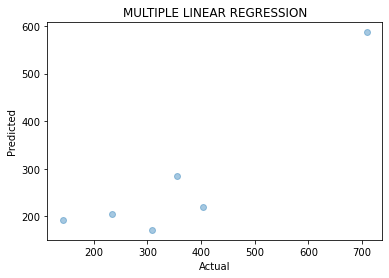

In [8]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

In [9]:
print(mlr.score(x_train, y_train))

0.6907486792231796


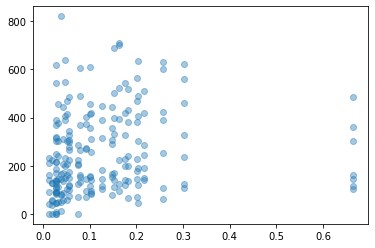

In [18]:
#plt.scatter(df[['강수']], df[['자전거대여량']], alpha=0.4)
#plt.show()

In [20]:
# 시청역
is_sicheong = df['자전거대여소명'] == '시청역'
sicheong = df[is_sicheong]

In [22]:
x = sicheong[['강수','강수형태','기온','풍속','풍향','학원_5분이내수', '학원_5분이내거리최소','학원_5분이내거리평균','학원_5분이내거리최대','버스_5분이내수','버스_5분이내거리최소','버스_5분이내거리평균','버스_5분이내거리최대',
               '콘서트장_5분이내수','콘서트장_5분이내거리최소','콘서트장_5분이내거리평균','콘서트장_5분이내거리최대','공공시설_5분이내수','공공시설_5분이내거리최소','공공시설_5분이내거리평균','공공시설_5분이내거리최대',
               '홀_5분이내수','홀_5분이내거리최소','홀_5분이내거리평균','홀_5분이내거리최대','미술관박물관(전시시설)_5분이내수','미술관박물관(전시시설)_5분이내거리최소','미술관박물관(전시시설)_5분이내거리평균','미술관박물관(전시시설)_5분이내거리최대','학교_5분이내수','학교_5분이내거리최소','학교_5분이내거리평균','학교_5분이내거리최대','체육시설_5분이내수','체육시설_5분이내거리최소',
               '체육시설_5분이내거리평균','체육시설_5분이내거리최대','스타벅스_5분이내수','스타벅스_5분이내거리최소','스타벅스_5분이내거리평균','스타벅스_5분이내거리최대','부동산_5분이내수','부동산_5분이내거리최소','부동산_5분이내거리평균','부동산_5분이내거리최대','학문/교육_5분이내수','학문/교육_5분이내거리최소','학문/교육_5분이내거리평균','학문/교육_5분이내거리최대',
               '음식점_5분이내수','음식점_5분이내거리최소','음식점_5분이내거리평균','음식점_5분이내거리최대','생활서비스_5분이내수','생활서비스_5분이내거리최소','생활서비스_5분이내거리평균','생활서비스_5분이내거리최대','소매점_5분이내수','소매점_5분이내거리최소','소매점_5분이내거리평균','소매점_5분이내거리최대','스포츠_5분이내수','스포츠_5분이내거리최소','스포츠_5분이내거리평균',
               '스포츠_5분이내거리최대','숙박_5분이내수','숙박_5분이내거리최소','숙박_5분이내거리평균','숙박_5분이내거리최대','관광/여가/오락_5분이내수','관광/여가/오락_5분이내거리최소','관광/여가/오락_5분이내거리평균','관광/여가/오락_5분이내거리최대','지하철 역_5분이내수','지하철 역_5분이내거리최소','지하철 역_5분이내거리평균','지하철 역_5분이내거리최대','청소년 수련시설_5분이내수','청소년 수련시설_5분이내거리최소','청소년 수련시설_5분이내거리평균','청소년 수련시설_5분이내거리최대']]
y = sicheong[['자전거대여량']]

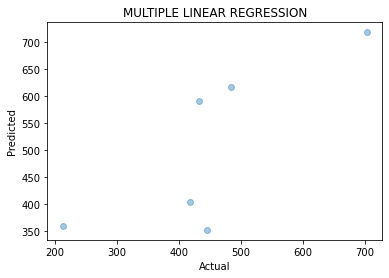

0.7274958975965815


In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)
mlr = LinearRegression()
mlr.fit(x_train, y_train) 
y_predict = mlr.predict(x_test)
import matplotlib.pyplot as plt
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()
print(mlr.score(x_train, y_train))

In [26]:
# 신중동역
is_sinjoongdong = df['자전거대여소명'] == '신중동역'
sinjoongdong = df[is_sinjoongdong]

In [27]:
x = sinjoongdong[['강수','강수형태','기온','풍속','풍향','학원_5분이내수', '학원_5분이내거리최소','학원_5분이내거리평균','학원_5분이내거리최대','버스_5분이내수','버스_5분이내거리최소','버스_5분이내거리평균','버스_5분이내거리최대',
               '콘서트장_5분이내수','콘서트장_5분이내거리최소','콘서트장_5분이내거리평균','콘서트장_5분이내거리최대','공공시설_5분이내수','공공시설_5분이내거리최소','공공시설_5분이내거리평균','공공시설_5분이내거리최대',
               '홀_5분이내수','홀_5분이내거리최소','홀_5분이내거리평균','홀_5분이내거리최대','미술관박물관(전시시설)_5분이내수','미술관박물관(전시시설)_5분이내거리최소','미술관박물관(전시시설)_5분이내거리평균','미술관박물관(전시시설)_5분이내거리최대','학교_5분이내수','학교_5분이내거리최소','학교_5분이내거리평균','학교_5분이내거리최대','체육시설_5분이내수','체육시설_5분이내거리최소',
               '체육시설_5분이내거리평균','체육시설_5분이내거리최대','스타벅스_5분이내수','스타벅스_5분이내거리최소','스타벅스_5분이내거리평균','스타벅스_5분이내거리최대','부동산_5분이내수','부동산_5분이내거리최소','부동산_5분이내거리평균','부동산_5분이내거리최대','학문/교육_5분이내수','학문/교육_5분이내거리최소','학문/교육_5분이내거리평균','학문/교육_5분이내거리최대',
               '음식점_5분이내수','음식점_5분이내거리최소','음식점_5분이내거리평균','음식점_5분이내거리최대','생활서비스_5분이내수','생활서비스_5분이내거리최소','생활서비스_5분이내거리평균','생활서비스_5분이내거리최대','소매점_5분이내수','소매점_5분이내거리최소','소매점_5분이내거리평균','소매점_5분이내거리최대','스포츠_5분이내수','스포츠_5분이내거리최소','스포츠_5분이내거리평균',
               '스포츠_5분이내거리최대','숙박_5분이내수','숙박_5분이내거리최소','숙박_5분이내거리평균','숙박_5분이내거리최대','관광/여가/오락_5분이내수','관광/여가/오락_5분이내거리최소','관광/여가/오락_5분이내거리평균','관광/여가/오락_5분이내거리최대','지하철 역_5분이내수','지하철 역_5분이내거리최소','지하철 역_5분이내거리평균','지하철 역_5분이내거리최대','청소년 수련시설_5분이내수','청소년 수련시설_5분이내거리최소','청소년 수련시설_5분이내거리평균','청소년 수련시설_5분이내거리최대']]
y = sinjoongdong[['자전거대여량']]

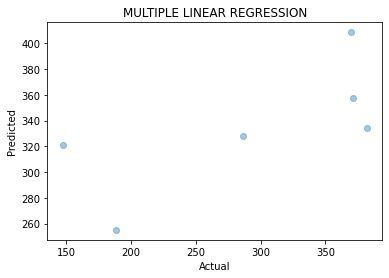

0.7957567544409467


In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)
mlr = LinearRegression()
mlr.fit(x_train, y_train) 
y_predict = mlr.predict(x_test)
import matplotlib.pyplot as plt
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()
print(mlr.score(x_train, y_train))

In [29]:
# 부천역
is_bucheon = df['자전거대여소명'] == '부천역'
bucheon = df[is_bucheon]

In [30]:
x = bucheon[['강수','강수형태','기온','풍속','풍향','학원_5분이내수', '학원_5분이내거리최소','학원_5분이내거리평균','학원_5분이내거리최대','버스_5분이내수','버스_5분이내거리최소','버스_5분이내거리평균','버스_5분이내거리최대',
               '콘서트장_5분이내수','콘서트장_5분이내거리최소','콘서트장_5분이내거리평균','콘서트장_5분이내거리최대','공공시설_5분이내수','공공시설_5분이내거리최소','공공시설_5분이내거리평균','공공시설_5분이내거리최대',
               '홀_5분이내수','홀_5분이내거리최소','홀_5분이내거리평균','홀_5분이내거리최대','미술관박물관(전시시설)_5분이내수','미술관박물관(전시시설)_5분이내거리최소','미술관박물관(전시시설)_5분이내거리평균','미술관박물관(전시시설)_5분이내거리최대','학교_5분이내수','학교_5분이내거리최소','학교_5분이내거리평균','학교_5분이내거리최대','체육시설_5분이내수','체육시설_5분이내거리최소',
               '체육시설_5분이내거리평균','체육시설_5분이내거리최대','스타벅스_5분이내수','스타벅스_5분이내거리최소','스타벅스_5분이내거리평균','스타벅스_5분이내거리최대','부동산_5분이내수','부동산_5분이내거리최소','부동산_5분이내거리평균','부동산_5분이내거리최대','학문/교육_5분이내수','학문/교육_5분이내거리최소','학문/교육_5분이내거리평균','학문/교육_5분이내거리최대',
               '음식점_5분이내수','음식점_5분이내거리최소','음식점_5분이내거리평균','음식점_5분이내거리최대','생활서비스_5분이내수','생활서비스_5분이내거리최소','생활서비스_5분이내거리평균','생활서비스_5분이내거리최대','소매점_5분이내수','소매점_5분이내거리최소','소매점_5분이내거리평균','소매점_5분이내거리최대','스포츠_5분이내수','스포츠_5분이내거리최소','스포츠_5분이내거리평균',
               '스포츠_5분이내거리최대','숙박_5분이내수','숙박_5분이내거리최소','숙박_5분이내거리평균','숙박_5분이내거리최대','관광/여가/오락_5분이내수','관광/여가/오락_5분이내거리최소','관광/여가/오락_5분이내거리평균','관광/여가/오락_5분이내거리최대','지하철 역_5분이내수','지하철 역_5분이내거리최소','지하철 역_5분이내거리평균','지하철 역_5분이내거리최대','청소년 수련시설_5분이내수','청소년 수련시설_5분이내거리최소','청소년 수련시설_5분이내거리평균','청소년 수련시설_5분이내거리최대']]
y = bucheon[['자전거대여량']]

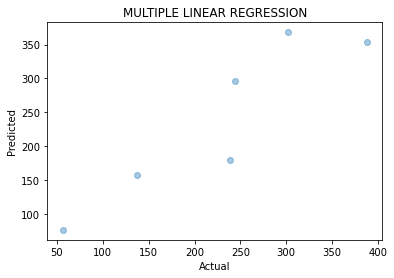

0.5935438088589753


In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)
mlr = LinearRegression()
mlr.fit(x_train, y_train) 
y_predict = mlr.predict(x_test)
import matplotlib.pyplot as plt
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()
print(mlr.score(x_train, y_train))

In [9]:
# 송내역
is_songnae = df['자전거대여소명'] == '송내역'
songnae = df[is_songnae]

In [10]:
x = songnae[['강수','강수형태','기온','풍속','풍향','학원_5분이내수', '학원_5분이내거리최소','학원_5분이내거리평균','학원_5분이내거리최대','버스_5분이내수','버스_5분이내거리최소','버스_5분이내거리평균','버스_5분이내거리최대',
               '콘서트장_5분이내수','콘서트장_5분이내거리최소','콘서트장_5분이내거리평균','콘서트장_5분이내거리최대','공공시설_5분이내수','공공시설_5분이내거리최소','공공시설_5분이내거리평균','공공시설_5분이내거리최대',
               '홀_5분이내수','홀_5분이내거리최소','홀_5분이내거리평균','홀_5분이내거리최대','미술관박물관(전시시설)_5분이내수','미술관박물관(전시시설)_5분이내거리최소','미술관박물관(전시시설)_5분이내거리평균','미술관박물관(전시시설)_5분이내거리최대','학교_5분이내수','학교_5분이내거리최소','학교_5분이내거리평균','학교_5분이내거리최대','체육시설_5분이내수','체육시설_5분이내거리최소',
               '체육시설_5분이내거리평균','체육시설_5분이내거리최대','스타벅스_5분이내수','스타벅스_5분이내거리최소','스타벅스_5분이내거리평균','스타벅스_5분이내거리최대','부동산_5분이내수','부동산_5분이내거리최소','부동산_5분이내거리평균','부동산_5분이내거리최대','학문/교육_5분이내수','학문/교육_5분이내거리최소','학문/교육_5분이내거리평균','학문/교육_5분이내거리최대',
               '음식점_5분이내수','음식점_5분이내거리최소','음식점_5분이내거리평균','음식점_5분이내거리최대','생활서비스_5분이내수','생활서비스_5분이내거리최소','생활서비스_5분이내거리평균','생활서비스_5분이내거리최대','소매점_5분이내수','소매점_5분이내거리최소','소매점_5분이내거리평균','소매점_5분이내거리최대','스포츠_5분이내수','스포츠_5분이내거리최소','스포츠_5분이내거리평균',
               '스포츠_5분이내거리최대','숙박_5분이내수','숙박_5분이내거리최소','숙박_5분이내거리평균','숙박_5분이내거리최대','관광/여가/오락_5분이내수','관광/여가/오락_5분이내거리최소','관광/여가/오락_5분이내거리평균','관광/여가/오락_5분이내거리최대','지하철 역_5분이내수','지하철 역_5분이내거리최소','지하철 역_5분이내거리평균','지하철 역_5분이내거리최대','청소년 수련시설_5분이내수','청소년 수련시설_5분이내거리최소','청소년 수련시설_5분이내거리평균','청소년 수련시설_5분이내거리최대']]
y = songnae[['자전거대여량']]

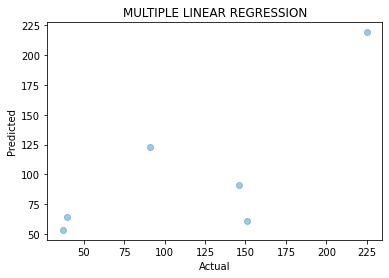

0.6585503141134079


In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)
mlr = LinearRegression()
mlr.fit(x_train, y_train) 
y_predict = mlr.predict(x_test)
import matplotlib.pyplot as plt
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()
print(mlr.score(x_train, y_train))

In [6]:
# 부천시청
is_busi = df['자전거대여소명'] == '부천시청'
busi = df[is_busi]

In [7]:
x = busi[['강수','강수형태','기온','풍속','풍향','학원_5분이내수', '학원_5분이내거리최소','학원_5분이내거리평균','학원_5분이내거리최대','버스_5분이내수','버스_5분이내거리최소','버스_5분이내거리평균','버스_5분이내거리최대',
               '콘서트장_5분이내수','콘서트장_5분이내거리최소','콘서트장_5분이내거리평균','콘서트장_5분이내거리최대','공공시설_5분이내수','공공시설_5분이내거리최소','공공시설_5분이내거리평균','공공시설_5분이내거리최대',
               '홀_5분이내수','홀_5분이내거리최소','홀_5분이내거리평균','홀_5분이내거리최대','미술관박물관(전시시설)_5분이내수','미술관박물관(전시시설)_5분이내거리최소','미술관박물관(전시시설)_5분이내거리평균','미술관박물관(전시시설)_5분이내거리최대','학교_5분이내수','학교_5분이내거리최소','학교_5분이내거리평균','학교_5분이내거리최대','체육시설_5분이내수','체육시설_5분이내거리최소',
               '체육시설_5분이내거리평균','체육시설_5분이내거리최대','스타벅스_5분이내수','스타벅스_5분이내거리최소','스타벅스_5분이내거리평균','스타벅스_5분이내거리최대','부동산_5분이내수','부동산_5분이내거리최소','부동산_5분이내거리평균','부동산_5분이내거리최대','학문/교육_5분이내수','학문/교육_5분이내거리최소','학문/교육_5분이내거리평균','학문/교육_5분이내거리최대',
               '음식점_5분이내수','음식점_5분이내거리최소','음식점_5분이내거리평균','음식점_5분이내거리최대','생활서비스_5분이내수','생활서비스_5분이내거리최소','생활서비스_5분이내거리평균','생활서비스_5분이내거리최대','소매점_5분이내수','소매점_5분이내거리최소','소매점_5분이내거리평균','소매점_5분이내거리최대','스포츠_5분이내수','스포츠_5분이내거리최소','스포츠_5분이내거리평균',
               '스포츠_5분이내거리최대','숙박_5분이내수','숙박_5분이내거리최소','숙박_5분이내거리평균','숙박_5분이내거리최대','관광/여가/오락_5분이내수','관광/여가/오락_5분이내거리최소','관광/여가/오락_5분이내거리평균','관광/여가/오락_5분이내거리최대','지하철 역_5분이내수','지하철 역_5분이내거리최소','지하철 역_5분이내거리평균','지하철 역_5분이내거리최대','청소년 수련시설_5분이내수','청소년 수련시설_5분이내거리최소','청소년 수련시설_5분이내거리평균','청소년 수련시설_5분이내거리최대']]
y = busi[['자전거대여량']]

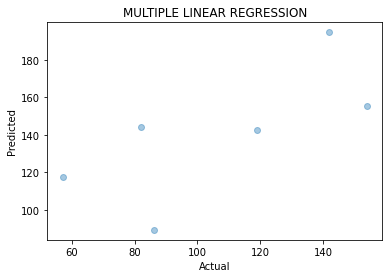

0.46769831251982585


In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)
mlr = LinearRegression()
mlr.fit(x_train, y_train) 
y_predict = mlr.predict(x_test)
import matplotlib.pyplot as plt
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()
print(mlr.score(x_train, y_train))

In [9]:
# 굴포천
is_gool = df['자전거대여소명'] == '굴포천'
gool = df[is_gool]

In [10]:
x = gool[['강수','강수형태','기온','풍속','풍향','학원_5분이내수', '학원_5분이내거리최소','학원_5분이내거리평균','학원_5분이내거리최대','버스_5분이내수','버스_5분이내거리최소','버스_5분이내거리평균','버스_5분이내거리최대',
               '콘서트장_5분이내수','콘서트장_5분이내거리최소','콘서트장_5분이내거리평균','콘서트장_5분이내거리최대','공공시설_5분이내수','공공시설_5분이내거리최소','공공시설_5분이내거리평균','공공시설_5분이내거리최대',
               '홀_5분이내수','홀_5분이내거리최소','홀_5분이내거리평균','홀_5분이내거리최대','미술관박물관(전시시설)_5분이내수','미술관박물관(전시시설)_5분이내거리최소','미술관박물관(전시시설)_5분이내거리평균','미술관박물관(전시시설)_5분이내거리최대','학교_5분이내수','학교_5분이내거리최소','학교_5분이내거리평균','학교_5분이내거리최대','체육시설_5분이내수','체육시설_5분이내거리최소',
               '체육시설_5분이내거리평균','체육시설_5분이내거리최대','스타벅스_5분이내수','스타벅스_5분이내거리최소','스타벅스_5분이내거리평균','스타벅스_5분이내거리최대','부동산_5분이내수','부동산_5분이내거리최소','부동산_5분이내거리평균','부동산_5분이내거리최대','학문/교육_5분이내수','학문/교육_5분이내거리최소','학문/교육_5분이내거리평균','학문/교육_5분이내거리최대',
               '음식점_5분이내수','음식점_5분이내거리최소','음식점_5분이내거리평균','음식점_5분이내거리최대','생활서비스_5분이내수','생활서비스_5분이내거리최소','생활서비스_5분이내거리평균','생활서비스_5분이내거리최대','소매점_5분이내수','소매점_5분이내거리최소','소매점_5분이내거리평균','소매점_5분이내거리최대','스포츠_5분이내수','스포츠_5분이내거리최소','스포츠_5분이내거리평균',
               '스포츠_5분이내거리최대','숙박_5분이내수','숙박_5분이내거리최소','숙박_5분이내거리평균','숙박_5분이내거리최대','관광/여가/오락_5분이내수','관광/여가/오락_5분이내거리최소','관광/여가/오락_5분이내거리평균','관광/여가/오락_5분이내거리최대','지하철 역_5분이내수','지하철 역_5분이내거리최소','지하철 역_5분이내거리평균','지하철 역_5분이내거리최대','청소년 수련시설_5분이내수','청소년 수련시설_5분이내거리최소','청소년 수련시설_5분이내거리평균','청소년 수련시설_5분이내거리최대']]
y = gool[['자전거대여량']]

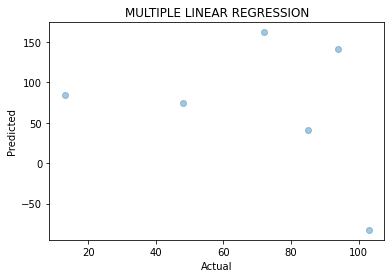

0.41853813566673315


In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)
mlr = LinearRegression()
mlr.fit(x_train, y_train) 
y_predict = mlr.predict(x_test)
import matplotlib.pyplot as plt
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()
print(mlr.score(x_train, y_train))